# Proyek Analisis Data: Air-quality-dataset
- **Nama:** Dina Lestari
- **Email:** lestaridina096@gmail.com
- **ID Dicoding:** dinals

## Menentukan Pertanyaan Bisnis

- Bagaimana tren kecepatan angin setiap bulannya di station Dongsi?
- Bagaimana korelasi antara suhu (TEMP) dengan polusi udara (PM2.5, PM10, NO2, SO2, O3) di station Dongsi?
- Bagaimana korelasi kecepatan angin (WSPM) terhadap penyebaran polusi udara  (PM2.5, PM10, NO2, SO2, O3) di station Dongsi?
- Bagaimana korelasi antar berbagai polutan (PM2.5, PM10, NO2, SO2, O3) di station Dongsi?

## Import Semua Packages/Library yang Digunakan

In [37]:
# first of all we import all packages/library we need
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

In [38]:
# Load air quality dataset @ dongsi
air_quality_dongsi_df = pd.read_csv('dongsi.csv')
air_quality_dongsi_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Dongsi
1,2,2013,3,1,1,4.0,4.0,3.0,16.0,300.0,88.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Dongsi
2,3,2013,3,1,2,7.0,7.0,NaN,17.0,300.0,60.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Dongsi
3,4,2013,3,1,3,3.0,3.0,5.0,18.0,NaN,NaN,-1.4,1026.2,-25.5,0.0,N,4.9,Dongsi
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,200.0,84.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Dongsi


**Insight:**
- Dataset ini adalah kumpulan data kualitas udara yang diambil dari Beijing, China, tepatnya di station Dongsi 1 Maret 2013 dan 28 Februari 2017. Data ini dikumpulkan sebagai bagian dari studi kualitas udara dan cuaca di Beijing.

- Pada tabel terdapat 18 kolom.



### Assessing Data

In [39]:
# informasi Dongsi Table
air_quality_dongsi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34314 non-null  float64
 6   PM10     34511 non-null  float64
 7   SO2      34401 non-null  float64
 8   NO2      33463 non-null  float64
 9   CO       31867 non-null  float64
 10  O3       34400 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


Jika dilihat dari informasi di atas, pada tabel Dongsi, terdapat jumlah data yang berbeda di beberapa kolom dengan jumlah data sebenarnya. Hal ini mengindikasi adanya missing value.

In [40]:
# cek jumlah missing value di tabel dongsi
air_quality_dongsi_df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,750
PM10,553
SO2,663
NO2,1601
CO,3197


In [41]:
# cek duplikasi data di tabel dongsi
print("Jumlah duplikasi: ", air_quality_dongsi_df.duplicated().sum())

Jumlah duplikasi:  0


In [42]:
# Method describe akan menampilkan ringkasan parameter statistik (mean, median, dll.) dari kolom numerik pada sebuah DataFrame
air_quality_dongsi_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34314.000000,34511.000000,34401.000000,33463.000000,31867.000000,34400.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,86.194297,110.336742,18.531107,53.699443,1330.069131,57.210637,13.671490,1012.547419,2.447535,0.064020,1.860785
std,10122.249256,1.177213,3.448752,8.800218,6.922285,86.575127,98.219860,22.905655,33.959230,1191.305887,58.033275,11.458418,10.266059,13.810696,0.786282,1.280368
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.642600,-16.800000,987.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,4.000000,27.000000,600.000000,12.000000,3.100000,1004.000000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,61.000000,86.000000,10.000000,47.000000,1000.000000,44.125200,14.600000,1012.200000,3.000000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,119.000000,151.000000,24.000000,73.000000,1700.000000,81.000000,23.500000,1020.900000,15.000000,0.000000,2.400000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,737.000000,955.000000,300.000000,258.000000,10000.000000,1071.000000,41.100000,1042.000000,28.800000,46.400000,10.500000


**Insight:**
- Pada tabel terdapat missing value di beberapa kolom.
- Tabel bersih dari duplikasi data.
- Tipe data pada setiap kolom sudah sesuai.

### Cleaning Data

In [43]:
air_quality_dongsi_df[air_quality_dongsi_df.isna()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35060,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35061,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35062,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Berdasarkan gambar di atas, dapat dilihat bahwa baris data tersebut masih mengandung banyak informasi penting sehingga sayang jika langsung dibuang. Oleh karena itu, pada kasus ini, kita akan menggunakan metode imputation untuk menangani missing value.

In [44]:
# mengubah nama kolom PM2.5 menjadi PM25, tujuannya agar dapat di proses dengan mudah
air_quality_dongsi_df.rename(columns={'PM2.5': 'PM25'}, inplace=True)


In [45]:
air_quality_dongsi_df.PM25.value_counts()

,count
PM25,
3.0,892
10.0,545
8.0,524
12.0,517
9.0,504
...,...
684.0,1
628.0,1
640.0,1


In [46]:
air_quality_dongsi_df.PM10.value_counts()

,count
PM10,
6.0,405
5.0,377
16.0,296
22.0,291
24.0,286
...,...
642.0,1
453.0,1
649.0,1


In [47]:
air_quality_dongsi_df.SO2.value_counts()

,count
SO2,
2.0000,6248
3.0000,1788
4.0000,1671
5.0000,1432
6.0000,1408
...,...
71.4000,1
67.4016,1
38.5560,1


In [48]:
air_quality_dongsi_df.NO2.value_counts()

,count
NO2,
20.0000,468
32.0000,456
30.0000,448
34.0000,444
28.0000,436
...,...
139.1934,1
134.6768,1
103.2659,1


In [49]:
air_quality_dongsi_df.CO.value_counts()


,count
CO,
300.0,2419
400.0,2137
700.0,2076
600.0,2050
500.0,1978
...,...
6599.0,1
5299.0,1
5099.0,1


In [50]:
air_quality_dongsi_df.O3.value_counts()


,count
O3,
2.0000,2950
3.0000,904
4.0000,862
5.0000,600
6.0000,541
...,...
111.3840,1
91.0350,1
88.4646,1


In [51]:
air_quality_dongsi_df.TEMP.value_counts()


,count
TEMP,
3.000000,401
0.000000,332
1.000000,326
-1.000000,315
2.000000,302
...,...
11.812500,1
10.260000,1
9.275000,1


In [52]:
air_quality_dongsi_df.PRES.value_counts()


,count
PRES,
1023.000000,305
1021.000000,258
1025.000000,254
1024.000000,253
1022.000000,244
...,...
1036.300000,1
1038.100000,1
1037.600000,1


In [53]:
air_quality_dongsi_df.DEWP.value_counts()


,count
DEWP,
17.6,142
16.9,133
16.2,130
16.4,130
17.0,129
...,...
-28.7,1
27.6,1
27.9,1


In [54]:
air_quality_dongsi_df.RAIN.value_counts()


,count
RAIN,
0.0,33673
0.1,310
0.2,147
0.3,118
0.5,74
...,...
17.2,1
10.1,1
9.9,1


In [55]:
air_quality_dongsi_df.wd.value_counts()


,count
wd,
ENE,3861
E,3564
NE,3540
ESE,2706
SW,2481
NW,2466
SSW,1953
NNE,1928
SE,1880


In [56]:
air_quality_dongsi_df.WSPM.value_counts()


,count
WSPM,
1.2,1863
1.1,1838
1.0,1782
1.3,1713
0.9,1642
...,...
9.5,1
10.3,1
9.8,1


Berdasarkan hasil di atas, dapat diketahui bahwa nilai yang paling dominan dalam kolom PM25=3.0, PM10=6.0, SO2=2.0000, NO2=20.0000, CO=300.0, O3=2.0000, TEMP=3.000000, PRES=1023.000000, DEWP=17.6, RAIN=0.0, wd=ENE, WSPM=1.2. Nilai inilah yang selanjutnya akan kita gunakan sebagai pengganti missing value.

In [57]:
air_quality_dongsi_df.PM25.fillna(value=3.0, inplace=True)

<ipython-input-57-91e4af860a49>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  air_quality_dongsi_df.PM25.fillna(value=3.0, inplace=True)


In [58]:
air_quality_dongsi_df.PM10.fillna(value=6.0, inplace=True)

<ipython-input-58-8b64ae941944>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  air_quality_dongsi_df.PM10.fillna(value=6.0, inplace=True)


In [59]:
air_quality_dongsi_df.SO2.fillna(value=2.0000, inplace=True)

<ipython-input-59-0ff4b3394c05>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  air_quality_dongsi_df.SO2.fillna(value=2.0000, inplace=True)


In [60]:
air_quality_dongsi_df.NO2.fillna(value=20.0000, inplace=True)

<ipython-input-60-5b8990bad129>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  air_quality_dongsi_df.NO2.fillna(value=20.0000, inplace=True)


In [61]:
air_quality_dongsi_df.CO.fillna(value=300.0, inplace=True)

<ipython-input-61-100553ebccd4>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  air_quality_dongsi_df.CO.fillna(value=300.0, inplace=True)


In [62]:
air_quality_dongsi_df.O3.fillna(value=2.0000, inplace=True)

<ipython-input-62-a31dfa2e80c8>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  air_quality_dongsi_df.O3.fillna(value=2.0000, inplace=True)


In [63]:
air_quality_dongsi_df.TEMP.fillna(value=3.000000, inplace=True)

<ipython-input-63-bdd3b7fdc686>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  air_quality_dongsi_df.TEMP.fillna(value=3.000000, inplace=True)


In [64]:
air_quality_dongsi_df.PRES.fillna(value=1023.000000, inplace=True)

<ipython-input-64-f8829c9bbd18>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  air_quality_dongsi_df.PRES.fillna(value=1023.000000, inplace=True)


In [65]:
air_quality_dongsi_df.DEWP.fillna(value=17.6, inplace=True)

<ipython-input-65-87e0b85b1a52>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  air_quality_dongsi_df.DEWP.fillna(value=17.6, inplace=True)


In [66]:
air_quality_dongsi_df.RAIN.fillna(value=0.0, inplace=True)

<ipython-input-66-d4aa75c556fc>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  air_quality_dongsi_df.RAIN.fillna(value=0.0, inplace=True)


In [67]:
air_quality_dongsi_df.wd.fillna(value='ENE', inplace=True)

<ipython-input-67-213a36777a67>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  air_quality_dongsi_df.wd.fillna(value='ENE', inplace=True)


In [68]:
air_quality_dongsi_df.WSPM.fillna(value=1.2, inplace=True)

<ipython-input-68-74a558228d0b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  air_quality_dongsi_df.WSPM.fillna(value=1.2, inplace=True)


In [69]:
air_quality_dongsi_df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM25,0
PM10,0
SO2,0
NO2,0
CO,0


**Insight**
- Kolom yang masih memiliki nilai NaN sudah ditangani dengan melakukan metode imputation. Diisi dengan nilai paling banyak muncul atau dominan di setiap kolomnya.


## Exploratory Data Analysis (EDA)

### Explore

In [70]:
air_quality_dongsi_df.describe(include="all")

,No,year,month,day,hour,PM25,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064,35064.000000,35064
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ENE,NaN,Dongsi
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3939,NaN,35064
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,84.414816,108.691230,18.218532,52.160748,1236.151409,56.165124,13.665403,1012.553381,2.456177,0.063983,NaN,1.860521,NaN
std,10122.249256,1.177213,3.448752,8.800218,6.922285,86.485888,98.305515,22.799513,33.912521,1173.768157,57.971671,11.457983,10.266164,13.811496,0.786059,NaN,1.280181,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.642600,-16.800000,987.100000,-35.300000,0.000000,NaN,0.000000,NaN
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,21.000000,36.000000,3.000000,25.000000,400.000000,11.000000,3.100000,1004.000000,-8.800000,0.000000,NaN,1.000000,NaN
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,85.000000,9.424800,45.000000,900.000000,43.000000,14.600000,1012.200000,3.100000,0.000000,NaN,1.500000,NaN
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,117.000000,150.000000,24.000000,72.000000,1600.000000,80.000000,23.500000,1020.900000,15.000000,0.000000,NaN,2.400000,NaN


Mencoba mengeskpor data untuk pertanyaan:
- Bagaimana korelasi antara suhu (TEMP) dengan polusi udara (PM2.5, PM10, NO2, SO2, O3) di station Dongsi?

In [71]:
temp_corr = air_quality_dongsi_df[[ 'TEMP','PM25','PM10', 'SO2', 'NO2','O3']].corr()
temp_corr

,TEMP,PM25,PM10,SO2,NO2,O3
TEMP,1.000000,-0.145187,-0.138993,-0.340126,-0.222594,0.564946
PM25,-0.145187,1.000000,0.887486,0.543686,0.649572,-0.125726
PM10,-0.138993,0.887486,1.000000,0.494438,0.632349,-0.112655
SO2,-0.340126,0.543686,0.494438,1.000000,0.407529,-0.146997
NO2,-0.222594,0.649572,0.632349,0.407529,1.000000,-0.427006
O3,0.564946,-0.125726,-0.112655,-0.146997,-0.427006,1.000000


Eksplorasi untuk menjawab pertanyaan:
- Bagaimana korelasi kecepatan angin (WSPM) terhadap penyebaran polusi udara  (PM2.5, PM10, NO2, SO2, O3) di station Dongsi?


In [72]:
wspm_corr = air_quality_dongsi_df[[ 'WSPM','PM25','PM10', 'SO2', 'NO2','O3']].corr()
wspm_corr

,WSPM,PM25,PM10,SO2,NO2,O3
WSPM,1.000000,-0.296827,-0.196315,-0.165870,-0.475414,0.286624
PM25,-0.296827,1.000000,0.887486,0.543686,0.649572,-0.125726
PM10,-0.196315,0.887486,1.000000,0.494438,0.632349,-0.112655
SO2,-0.165870,0.543686,0.494438,1.000000,0.407529,-0.146997
NO2,-0.475414,0.649572,0.632349,0.407529,1.000000,-0.427006
O3,0.286624,-0.125726,-0.112655,-0.146997,-0.427006,1.000000



- Bagaimana korelasi antar berbagai polutan (PM2.5, PM10, NO2, SO2, O3) di station Dongsi?

In [73]:
pol_corr = air_quality_dongsi_df[['PM25','PM10', 'SO2', 'NO2','O3']].corr()
pol_corr

,PM25,PM10,SO2,NO2,O3
PM25,1.000000,0.887486,0.543686,0.649572,-0.125726
PM10,0.887486,1.000000,0.494438,0.632349,-0.112655
SO2,0.543686,0.494438,1.000000,0.407529,-0.146997
NO2,0.649572,0.632349,0.407529,1.000000,-0.427006
O3,-0.125726,-0.112655,-0.146997,-0.427006,1.000000


**Insight:**
- Nilai rata-rata polutan pada station dongsi :
    - **PM2.5**: 84.414816
    - **PM10**: 108.691230
    - **SO2**:	18.218532
    - **NO2**: 52.160748
    - **O3**: 	56.165124
- Nilai rata-rata polutan pada station changpin:
    - **PM2.5**:  69.773106
    - **PM10**: 93.186308
    - **SO2**:	43.722085
    - **NO2**: 1124.005932
    - **O3**: 	56.976400

- Korelasi antara Temparature dengan polutan di station dongsi menunjukkan **korelasi positif yang sedang**. Artinya, ada hubungan yang cukup kuat antara kenaikan suhu dan peningkatan konsentrasi O3 (ozon).
- Korelasi antara kecepatan angin (WSPM) dengan O3 menunjukkan **korelasi positif yang lemah**. Ini berarti ada hubungan yang sangat kecil antara peningkatan kecepatan angin dengan konsentrasi O3, tetapi hubungan tersebut tidak kuat. Artinya ketika kecepatan angin meningkat, konsentrasi O3 juga cenderung sedikit meningkat, namun efeknya tidak terlalu besar.
- Korelasi antara PM2.5 dengan PM10 memiliki nilai korelasi positif yang tinggi, ini artinya ketika suatu polutan meningkat maka polutan yang lainnya juga akan meningkat. sedangkan dengan SO2 dan NO2 memiliki korelasi positif sedang, dan untuk korelasi dengan O3 memiliki korelasi negatif.
- Korelasi PM10 dengan SO2 dan NO2 memiliki korelasi positif sedang dan dengan O3 korelasi negatif.
- korelasi SO2 dengan NO2 memiliki korelasi positif rendah sedangkan dengan O3 memiliki korelasi O3.
- Polutan O3 memiliki korelasi negatif dengan polutan lainnya (PM2.5, PM10, SO2, NO2)


## Visualization & Explanatory Analysis

### Pertanyaan 1:

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

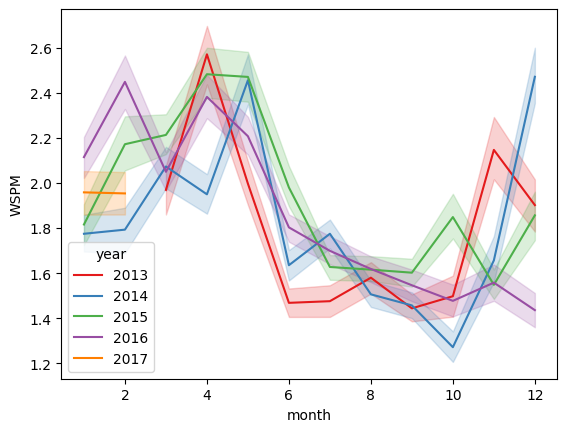

In [74]:
sns.lineplot(x=air_quality_dongsi_df['month'], y=air_quality_dongsi_df['WSPM'], hue=air_quality_dongsi_df['year'], palette='Set1')
plt.show()

### Pertanyaan 2:

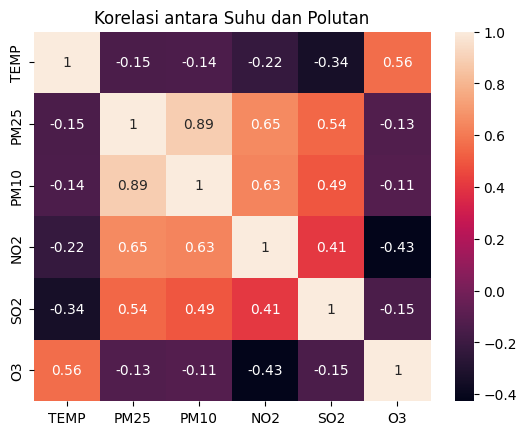

In [75]:
correlation_temp = air_quality_dongsi_df[['TEMP', 'PM25', 'PM10', 'NO2', 'SO2', 'O3']].corr()
sns.heatmap(correlation_temp, annot=True)
plt.title('Korelasi antara Suhu dan Polutan')
plt.show()

###Pertanyaan 3

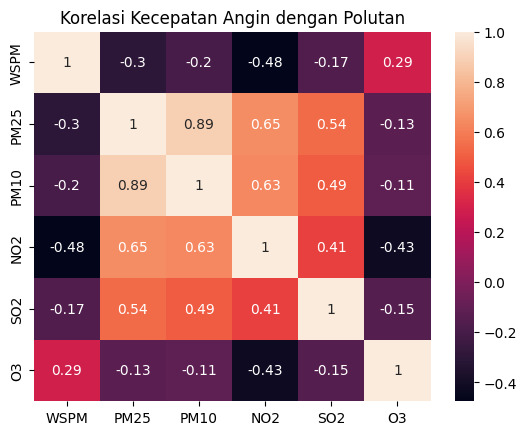

In [76]:
correlation_wspm = air_quality_dongsi_df[['WSPM', 'PM25', 'PM10', 'NO2', 'SO2', 'O3']].corr()
sns.heatmap(correlation_wspm, annot=True)
plt.title('Korelasi Kecepatan Angin dengan Polutan')
plt.show()


###Pertanyaan 4

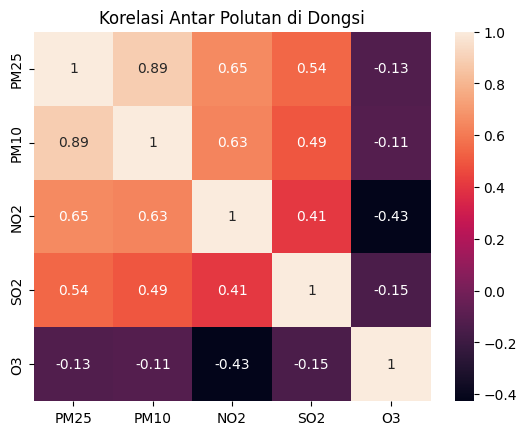

In [77]:
correlation_pollutants = air_quality_dongsi_df[['PM25', 'PM10', 'NO2', 'SO2', 'O3']].corr()
sns.heatmap(correlation_pollutants, annot=True)
plt.title('Korelasi Antar Polutan di Dongsi')
plt.show()


**Insight:**
- Dapat diketahui, pada Distrik Dongsi kecepatan angin cenderung tinggi dari bulan ke 4 (April) sampai bulan ke 5 (Mei).
- Korelasi antara Temparature dengan polutan di station dongsi menunjukkan **korelasi positif yang sedang** pada O3. Artinya, ada hubungan yang cukup kuat antara kenaikan suhu dan peningkatan konsentrasi O3 (ozon).
- Korelasi antara kecepatan angin (WSPM) dengan meningkatkanya polutan di station dongsi menunjukkan **korelasi positif yang lemah** pada O3. Ini berarti ada keterkaitan antara peningkatan kecepatan angin dan kenaikan konsentrasi O3, tetapi hubungan tersebut tidak kuat. Artinya ketika kecepatan angin meningkat, konsentrasi O3 juga cenderung sedikit meningkat atau efeknya tidak terlalu besar.
- Korelasi antara PM2.5 dengan PM10 memiliki nilai **korelasi positif yang tinggi**, ini artinya ketika salah satu polutan meningkat maka polutan yang lainnya juga akan meningkat. sedangkan dengan SO2 dan NO2 memiliki **korelasi positif sedang**.
- Korelasi PM10 dengan SO2 dan NO2 memiliki **korelasi positif sedang**.
- korelasi SO2 dengan NO2 memiliki **korelasi positif rendah**.
- Polutan O3 memiliki **korelasi negatif** dengan polutan lainnya (PM2.5, PM10, SO2, NO2)


## Analisis Lanjutan (Opsional)

In [79]:
analis_df = air_quality_dongsi_df[['month','PM25','PM10','SO2','NO2','O3']]
analis_df

,month,PM25,PM10,SO2,NO2,O3
0,3,9.0,9.0,3.0,17.0,89.0
1,3,4.0,4.0,3.0,16.0,88.0
2,3,7.0,7.0,2.0,17.0,60.0
3,3,3.0,3.0,5.0,18.0,2.0
4,3,3.0,3.0,7.0,20.0,84.0
...,...,...,...,...,...,...
35059,2,16.0,51.0,3.0,29.0,73.0
35060,2,18.0,45.0,3.0,43.0,54.0
35061,2,23.0,58.0,5.0,61.0,28.0
35062,2,23.0,53.0,9.0,75.0,15.0


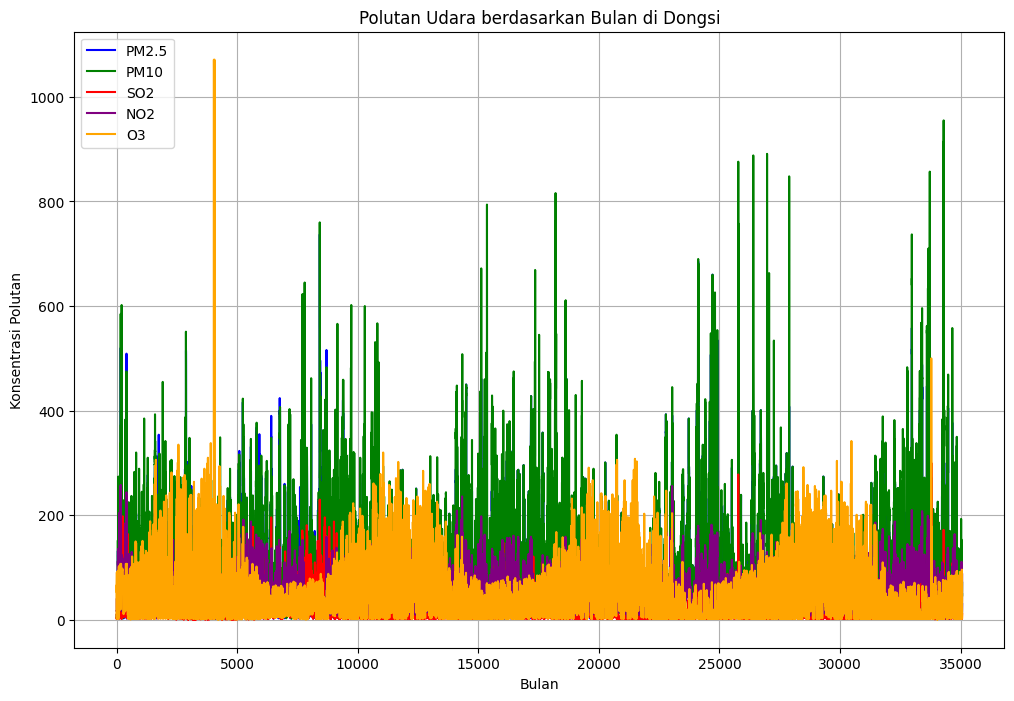

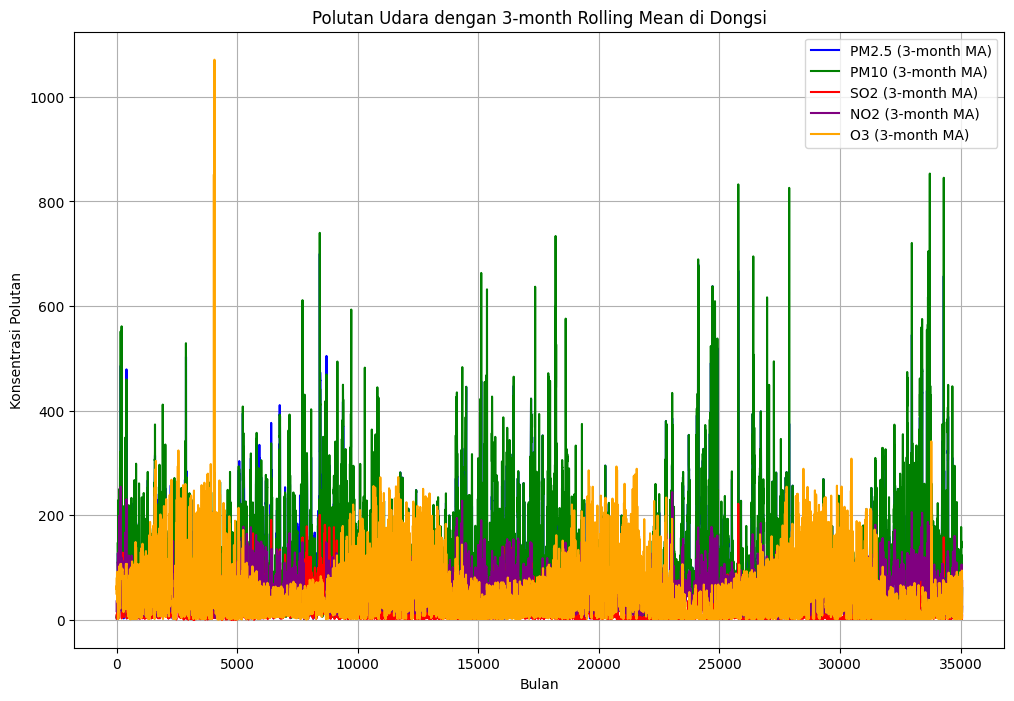

In [81]:
analis_df.set_index('month', inplace=True)

# Plot polutan dari waktu ke waktu berdasarkan bulan
plt.figure(figsize=(12, 8))
plt.plot(new_df.index, new_df['PM25'], label='PM2.5', color='blue')
plt.plot(new_df.index, new_df['PM10'], label='PM10', color='green')
plt.plot(new_df.index, new_df['SO2'], label='SO2', color='red')
plt.plot(new_df.index, new_df['NO2'], label='NO2', color='purple')
plt.plot(new_df.index, new_df['O3'], label='O3', color='orange')
plt.title('Polutan Udara berdasarkan Bulan di Dongsi')
plt.xlabel('Bulan')
plt.ylabel('Konsentrasi Polutan')
plt.legend()
plt.grid(True)
plt.show()

# Menggunakan rolling mean untuk menghaluskan data dan melihat tren jangka panjang
new_df_rolling = new_df.rolling(window=3).mean()  # Rolling mean dengan jendela 3 bulan

# Plot tren yang dihaluskan
plt.figure(figsize=(12, 8))
plt.plot(new_df_rolling.index, new_df_rolling['PM25'], label='PM2.5 (3-month MA)', color='blue')
plt.plot(new_df_rolling.index, new_df_rolling['PM10'], label='PM10 (3-month MA)', color='green')
plt.plot(new_df_rolling.index, new_df_rolling['SO2'], label='SO2 (3-month MA)', color='red')
plt.plot(new_df_rolling.index, new_df_rolling['NO2'], label='NO2 (3-month MA)', color='purple')
plt.plot(new_df_rolling.index, new_df_rolling['O3'], label='O3 (3-month MA)', color='orange')
plt.title('Polutan Udara dengan 3-month Rolling Mean di Dongsi')
plt.xlabel('Bulan')
plt.ylabel('Konsentrasi Polutan')
plt.legend()
plt.grid(True)
plt.show()

## Conclusion

- **Pertanyaan 1:**
    - Dapat diketahui, pada Distrik Dongsi kecepatan angin cenderung tinggi dari bulan ke 4 (April) sampai bulan ke 5 (Mei).

- **Pertanyaan 2:**
    - Korelasi antara Temparature dengan polutan di station dongsi menunjukkan **korelasi positif yang sedang** pada O3. Artinya, ada hubungan yang cukup kuat antara kenaikan suhu dan peningkatan konsentrasi O3 (ozon).

- **Pertanyaan 3:**
    -  Korelasi antara kecepatan angin (WSPM) dengan meningkatkanya polutan di station dongsi menunjukkan **korelasi positif yang lemah** pada O3. Ini berarti ada keterkaitan antara peningkatan kecepatan angin dan kenaikan konsentrasi O3, tetapi hubungan tersebut tidak kuat. Artinya ketika kecepatan angin meningkat, konsentrasi O3 juga cenderung sedikit meningkat atau efeknya tidak terlalu besar.

- **Pertanyaan 4:**
    - Korelasi antara PM2.5 dengan PM10 memiliki nilai **korelasi positif yang tinggi**, ini artinya ketika salah satu polutan meningkat maka polutan yang lainnya juga akan meningkat. sedangkan dengan SO2 dan NO2 memiliki **korelasi positif sedang**.
    - Korelasi PM10 dengan SO2 dan NO2 memiliki **korelasi positif sedang**.
    - korelasi SO2 dengan NO2 memiliki **korelasi positif rendah**.
    - Polutan O3 memiliki **korelasi negatif** dengan polutan lainnya (PM2.5, PM10, SO2, NO2)
